In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

# Set some parameters to get good visuals - style to ggplot and size to 15,10

pd.set_option('display.width',170, 'display.max_rows',200, 'display.max_columns',900)

In [2]:
df = pd.read_csv("clean_uk.csv")

In [3]:
list(df.columns)

['Unnamed: 0',
 'Year',
 'Adjusted net enrollment rate, primary (% of primary school age children)',
 'Adjusted net national income (annual % growth)',
 'Adjusted net national income (constant 2010 US$)',
 'Adjusted net national income (current US$)',
 'Adjusted net national income per capita (annual % growth)',
 'Adjusted net national income per capita (constant 2010 US$)',
 'Adjusted net national income per capita (current US$)',
 'Adjusted net savings, excluding particulate emission damage (% of GNI)',
 'Adjusted net savings, excluding particulate emission damage (current US$)',
 'Adjusted savings: carbon dioxide damage (% of GNI)',
 'Adjusted savings: carbon dioxide damage (current US$)',
 'Adjusted savings: consumption of fixed capital (% of GNI)',
 'Adjusted savings: consumption of fixed capital (current US$)',
 'Adjusted savings: education expenditure (% of GNI)',
 'Adjusted savings: education expenditure (current US$)',
 'Adjusted savings: energy depletion (% of GNI)',
 'Adjust

###### Economic development indicators
To assess the economic development of a country, geographers use economic indicators including:

* Gross Domestic Product (GDP) is the total value of goods and services produced by a country in a year.
* Gross National Product (GNP) measures the total economic output of a country, including earnings from foreign investments.
* GNP per capita is a country's GNP divided by its population. (Per capita means per person.)
* Economic growth measures the annual increase in GDP, GNP, GDP per capita, or GNP per capita.
* Inequality of wealth is the gap in income between a country's richest and poorest people. It can be measured in many ways, (eg the proportion of a country's wealth owned by the richest 10 per cent of the population, compared with the proportion owned by the remaining 90 per cent).
* Inflation measures how much the prices of goods, services and wages increase each year. High inflation (above a few percent) can be a bad thing, and suggests a government lacks control over the economy.
* Unemployment is the number of people who cannot find work.
* Economic structure shows the division of a country's economy between primary, secondary and tertiary industries.
* Demographics study population growth and structure. It compares birth rates to death rates, life expectancy and urban and rural ratios. Many LEDCs have a younger, faster-growing population than MEDCs, with more people living in the countryside than in towns. The birth rate in the UK is 11 per 1,000, whereas in Kenya it is 40.

In [4]:
dfe = df[[ 'Year',
 #GDP, GNI, GDP per capita, GNI per capita
 'GDP (current US$)',
 'GDP per capita (current US$)',
 #'GNI (current US$)',
 #'GNI per capita, Atlas method (current US$)',
 #GDP, GNI, GDP per capita, GNI per capita in percentages
 'GDP growth (annual %)', 
 'GDP per capita growth (annual %)',
 #'GNI growth (annual %)',
 #'GNI per capita growth (annual %)',
 
 #Infaltion
 'Inflation, GDP deflator (annual %)',
   'Consumer price index (2010 = 100)',
   'Tax revenue (% of GDP)',
  #urban and rural ratios 
   'Rural population',
 'Rural population (% of total population)',
 'Rural population growth (annual %)',
   'Urban population',
 'Urban population (% of total)',
 'Urban population growth (annual %)',
   #Unemployment is the number of people who cannot find work.
   'Employment to population ratio, 15+, female (%) (national estimate)',
 'Employment to population ratio, 15+, male (%) (national estimate)',
 'Employment to population ratio, 15+, total (%) (national estimate)',
 'Employment to population ratio, ages 15-24, female (%) (national estimate)',
 'Employment to population ratio, ages 15-24, male (%) (national estimate)',
 'Employment to population ratio, ages 15-24, total (%) (national estimate)',
'Ratio of female to male labor force participation rate (%) (national estimate)',
   'Part time employment, female (% of total female employment)',
 'Part time employment, male (% of total male employment)',
 'Part time employment, total (% of total employment)',
   'Unemployment, youth female (% of female labor force ages 15-24) (national estimate)',
 'Unemployment, youth male (% of male labor force ages 15-24) (national estimate)',
 'Unemployment, youth total (% of total labor force ages 15-24) (national estimate)',
  # Birth Rate
   'Birth rate, crude (per 1,000 people)',
   'Death rate, crude (per 1,000 people)',
   'Life expectancy at birth, female (years)',
 'Life expectancy at birth, male (years)',
 'Life expectancy at birth, total (years)',
    
 'Population growth (annual %)',
 'Population, female',
 'Population, female (% of total)',
 'Population, male',
 'Population, male (% of total)',
 'Population, total',
   
   #division of a country's economy between
   #'Agricultural land (% of land area)',
   'Merchandise exports (current US$)',
   'Merchandise imports (current US$)',
   'Exports of goods and services (% of GDP)',
 'Exports of goods and services (annual % growth)',
   'Exports of goods and services (current US$)',
   'Imports of goods and services (% of GDP)',
   'Imports of goods and services (annual % growth)',
   'Imports of goods and services (current US$)',
   #primary industries
  'Agricultural raw materials exports (% of merchandise exports)',
 'Agricultural raw materials imports (% of merchandise imports)',
   'Food exports (% of merchandise exports)',
 'Food imports (% of merchandise imports)',
   'Fuel exports (% of merchandise exports)',
 'Fuel imports (% of merchandise imports)',
   'Ores and metals exports (% of merchandise exports)',
 'Ores and metals imports (% of merchandise imports)',
   # secondary industries
   'Manufactures exports (% of merchandise exports)',
 'Manufactures imports (% of merchandise imports)',
   #tertiary industries.
   'Computer, communications and other services (% of commercial service exports)',
 'Computer, communications and other services (% of commercial service imports)',
   'Insurance and financial services (% of commercial service exports)',
 'Insurance and financial services (% of commercial service imports)',
   'Transport services (% of commercial service exports)',
 'Transport services (% of commercial service imports)',
   'Travel services (% of commercial service exports)',
 'Travel services (% of commercial service imports)',
   'Trade (% of GDP)',
 'Trade in services (% of GDP)',
          'School enrollment, primary (% gross)',
 'School enrollment, primary (% net)',
 'School enrollment, primary (gross), gender parity index (GPI)',
 'School enrollment, primary and secondary (gross), gender parity index (GPI)',
 'School enrollment, primary, female (% gross)',
 'School enrollment, primary, male (% gross)',
 'School enrollment, secondary (% gross)',
 'School enrollment, secondary (% net)',
 'School enrollment, secondary (gross), gender parity index (GPI)',
 'School enrollment, secondary, female (% gross)',
 'School enrollment, secondary, female (% net)',
 'School enrollment, secondary, male (% gross)',
 'School enrollment, secondary, male (% net)',
 'School enrollment, tertiary (% gross)',
 'School enrollment, tertiary (gross), gender parity index (GPI)',
 'School enrollment, tertiary, female (% gross)',
 'School enrollment, tertiary, male (% gross)',
 'Secondary education, duration (years)',
 'Secondary education, general pupils',
 'Secondary education, general pupils (% female)',
 'Secondary education, pupils',
 'Secondary education, pupils (% female)',
 'Secondary education, vocational pupils',
 'Secondary education, vocational pupils (% female)',
   
  ]]



In [5]:
#dfe.head()

In [6]:
dfe.to_csv("uk_econcomic.csv")

1.	Crude birth rate and death rate per year
2.	Life expectancy total and compare with male and female per year
3.	Population Vs GDP use year as hue. GDP has dropped as population increased. 2007 was the most than fell during recession.  2014 and than dropped again
4.	Divide GDP growth or amount into two groups and plot one beside the other. Year from 1973 – 1994, 1995-2017
5.	Imports vs exports.. imports have increased than exports
6.	Merchandise imports and exports of UK. Have an eye on the y-axis. Imports for agriculture, food and fuel are more than exports. Manufacturing and ores exports are more than imports.
7.	Commercial service: Insurance and Computer import is higher than exports but travel and transport services import is higher than exports. Both 5 and 6 means that poor and people not living in urban area were more hit.
8.	% or rural and % of urban is a better indicator because of the same scale. Make a plot with numbers and say it is not good. Plot rural vs another with hue as year and it shows that there is a decrease 
9.	Youth unemployment : most affected with 2004 starting unlike just around recession. Check for other countries
10.	Part time employment for females is twice as much as for males. No need for labour participation


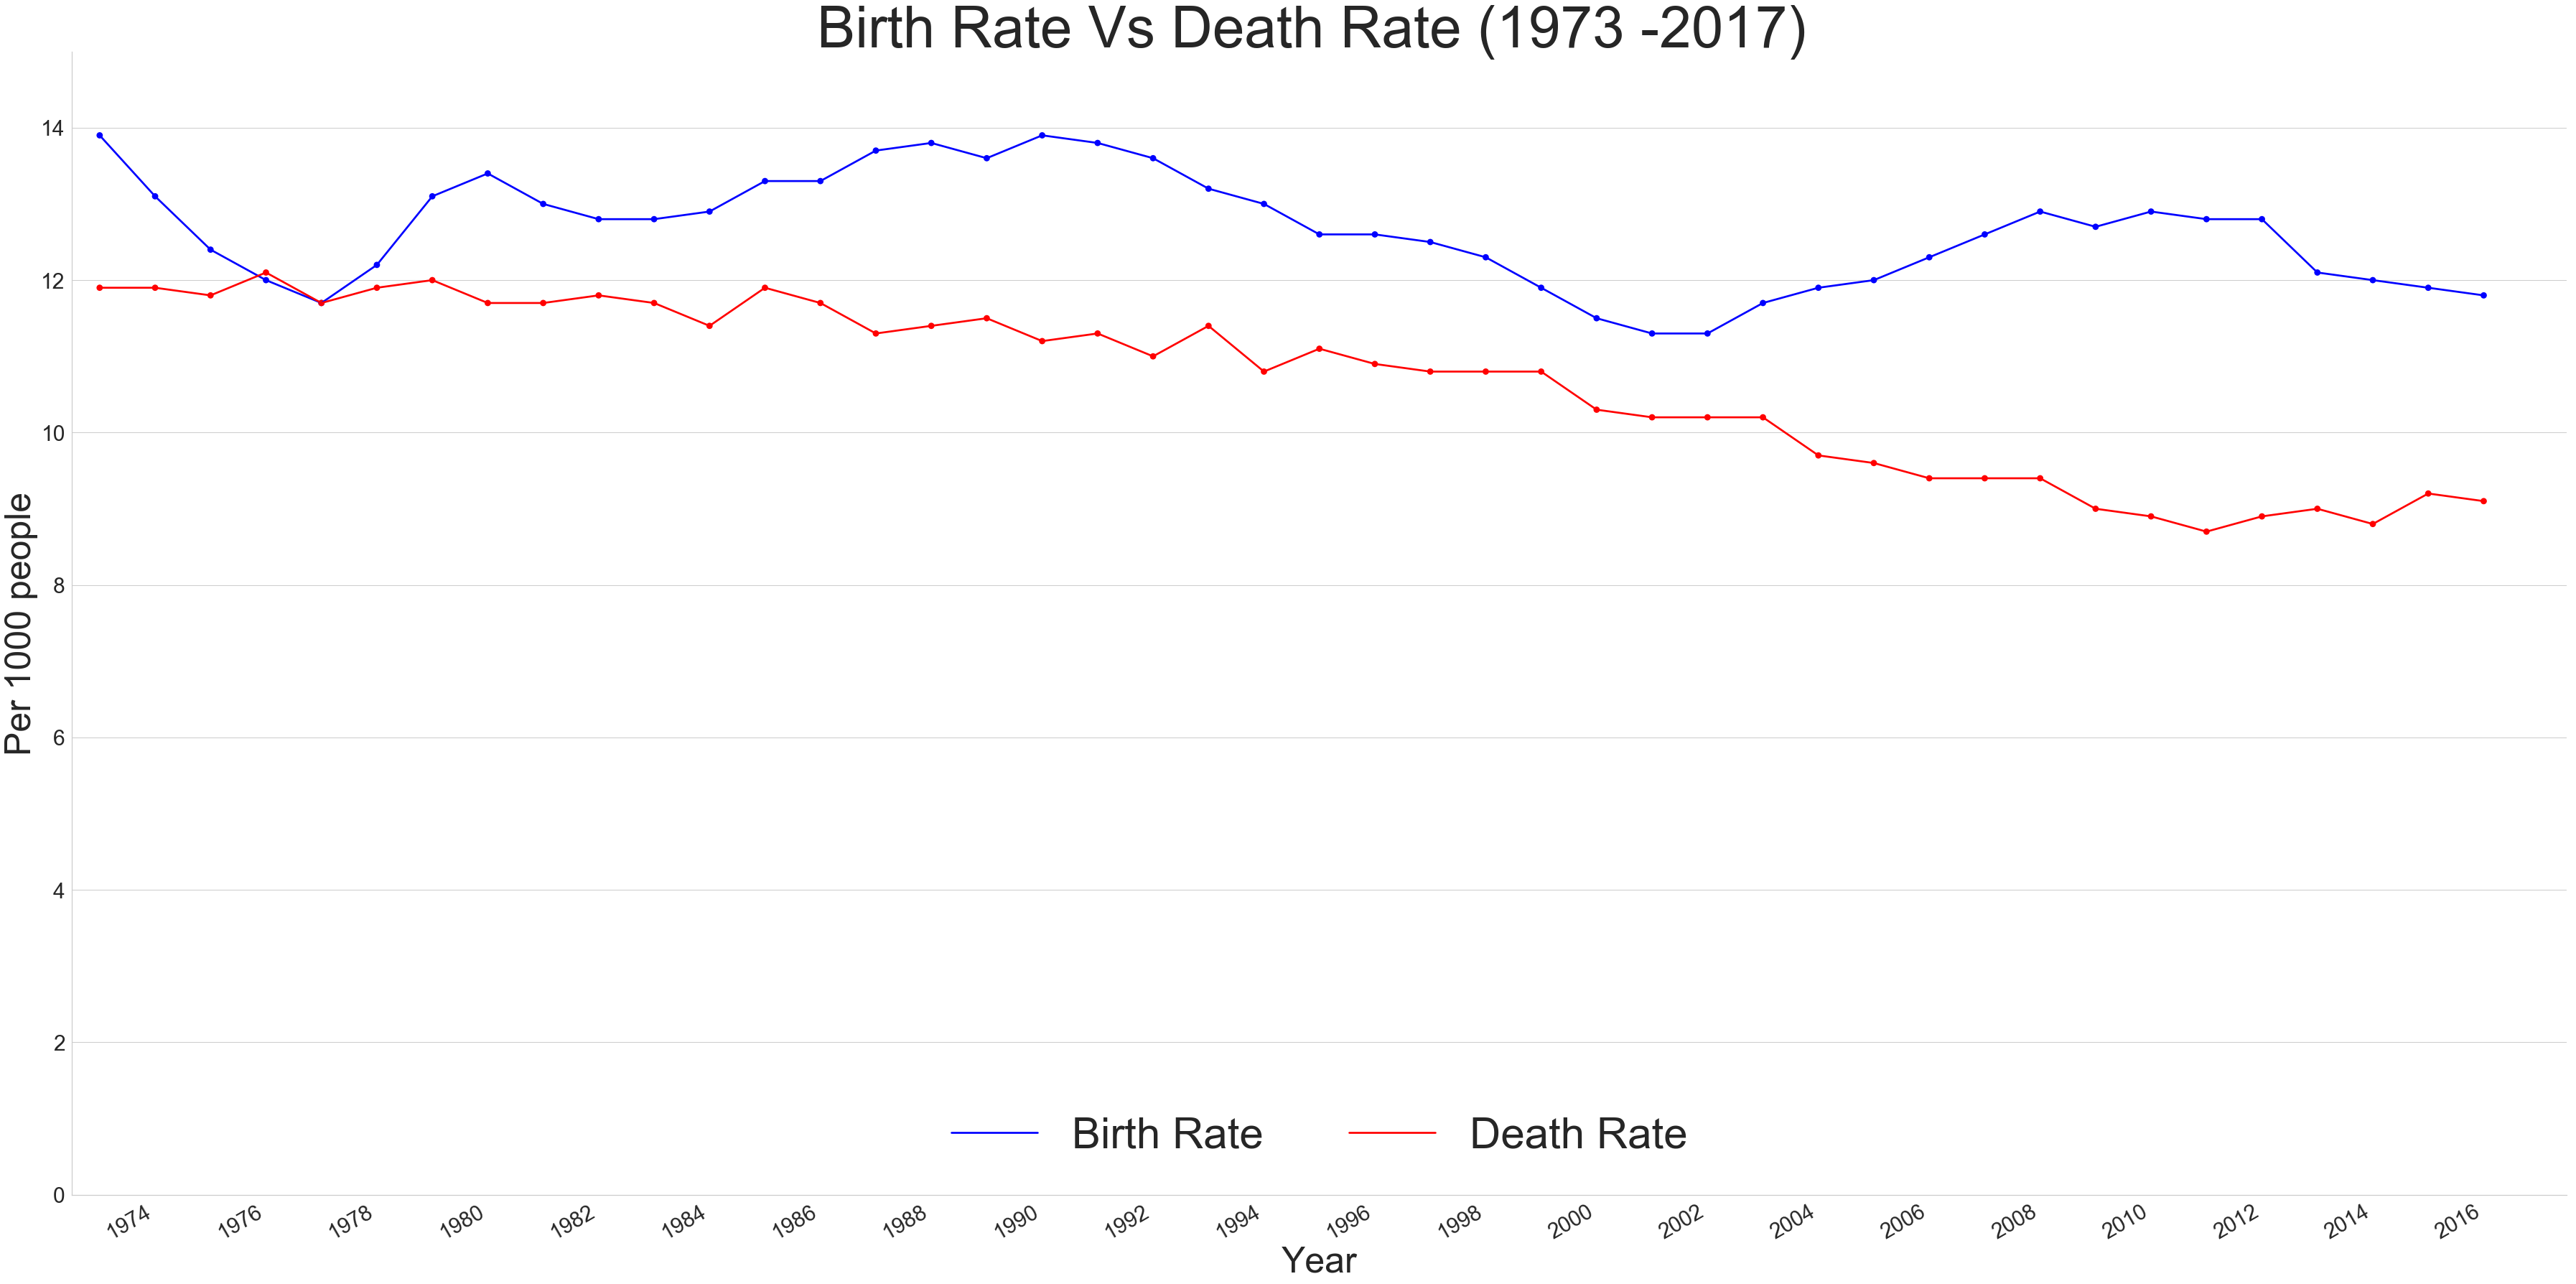

In [77]:
y_title_margin = 1.2
sns.set(style="whitegrid")
# Initialize the matplotlib figure
#f, ax = plt.subplots(figsize=(30, 4))
#two plots together
f, (ax1) = plt.subplots(1,figsize=(50, 25))

sns.pointplot(x= "Year",y='Birth rate, crude (per 1,000 people)',  data=dfe, ax=ax1,color='blue', label='Birth Rate')
sns.pointplot(x="Year", y="Death rate, crude (per 1,000 people)", data=dfe, ax=ax1,color='red', label='Death Rate')

# Plot the total 
sns.set_color_codes("deep")
#sns.scatterplot(x="Year", y='GDP (current US$)', data=dfe, color="r")
sns.despine()

plt.title('Birth Rate Vs Death Rate (1973 -2017) ', fontsize= 80)
plt.xlabel('Year', fontsize= 50)
plt.xticks(fontsize=30)
plt.ylabel('Per 1000 people', fontsize= 50)
plt.yticks(fontsize=30)
ax1.set_ylim(0,15)
#skip every one x-tick for cleanliness
plt.setp(ax1.get_xticklabels()[::2], visible=False)
#Plot the legend in in the center
ax1.legend(handles=ax1.lines[::len(dfe)+1], labels=["Birth Rate","Death Rate"],frameon=False, loc='lower center', ncol=2,fontsize= 60)

ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

In [25]:
#Two plots if neeeded
# sns.set(style="whitegrid")
# # Initialize the matplotlib figure
# #f, ax = plt.subplots(figsize=(30, 4))
# #two plots together
# f, (ax1, ax2) = plt.subplots(2,figsize=(50, 30))

# sns.lineplot(x= "Year",y='Birth rate, crude (per 1,000 people)',  data=dfe, ax=ax1)
# sns.lineplot(x="Year", y="Death rate, crude (per 1,000 people)", data=dfe, ax=ax2)

# # Plot the total crashes
# sns.set_color_codes("deep")
# #sns.scatterplot(x="Year", y='GDP (current US$)', data=dfe, color="r")
# #sns.despine()
# # plt.title('Total GDP in UK ', fontsize= 15)
# # plt.xlabel('Year', fontsize= 15)
# # plt.ylabel('GDP (current US$)', fontsize= 15)
# # plt.show()

###### Divide 44 years into section to compare the difference between the first 22 years since joining the eu and the other 22 years before leaving the eu

In [13]:
df1 = dfe[dfe['Year'].isin([1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994])]

df2 = dfe[dfe['Year'].isin([1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017])]

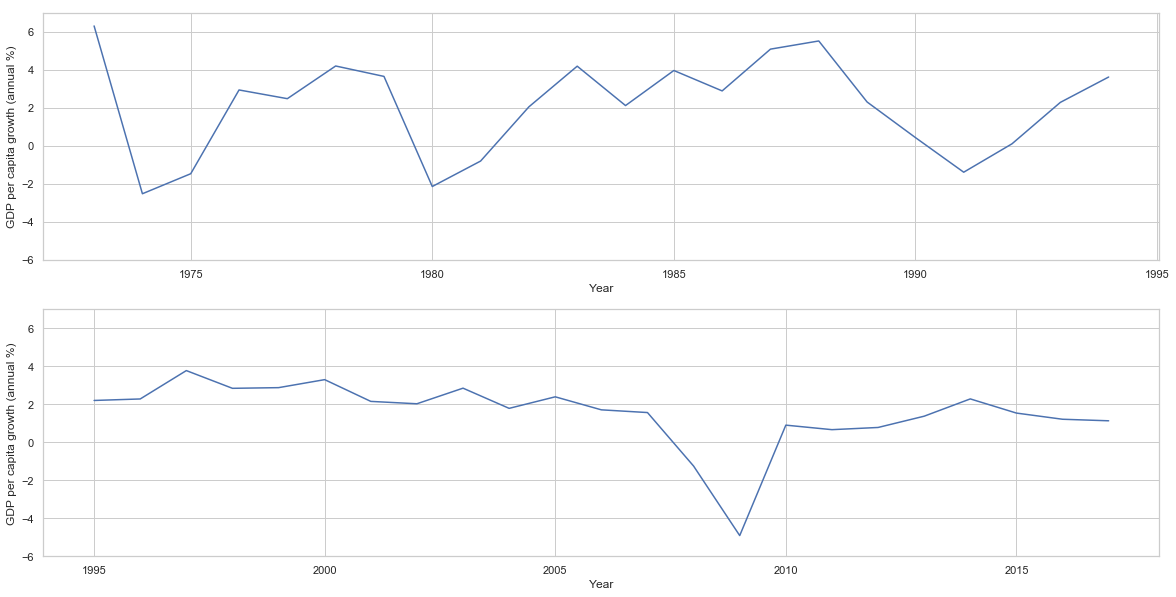

In [21]:
f, (ax1, ax2) = plt.subplots(2,figsize=(20, 10))
sns.lineplot(x="Year",y= "GDP per capita growth (annual %)", data=df1, ax=ax1)
sns.lineplot(x="Year", y="GDP per capita growth (annual %)", data=df2, ax=ax2)
ax1.set_ylim(-6,7)
ax2.set_ylim(-6,7)
plt.show()

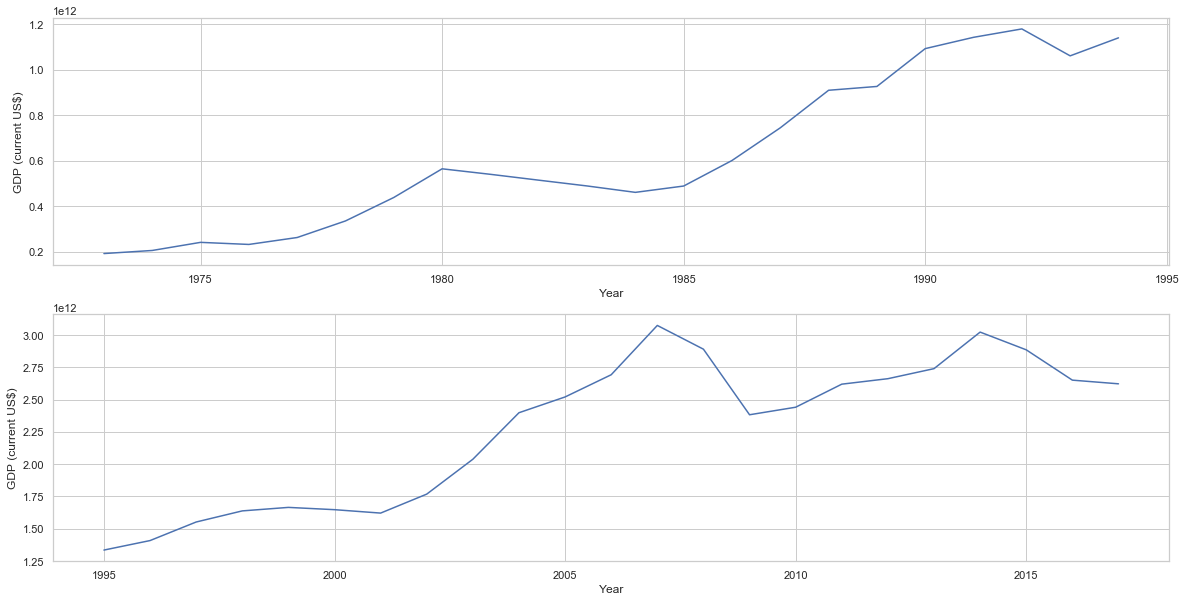

In [18]:
f, (ax1, ax2) = plt.subplots(2,figsize=(20, 10))
sns.lineplot(x="Year",y= "GDP (current US$)", data=df1, ax=ax1)
sns.lineplot(x="Year", y="GDP (current US$)", data=df2, ax=ax2)


##### Matplotlib

In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (100, 50)
# plot the data
plt.plot(dfip['Year'],dfip['Total Population'],color ='blue') 
# We change the fontsize of minor ticks label 
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('Total Population in Irealnd from 1960 -2017', fontsize= 15)
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Total Population', fontsize= 15)
plt.grid(which='both')
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
dfip.hist(column="Total Population",        # Column to plot
              figsize=(20,20),         # Plot size
              color="blue",          # Plot color
              bins= 5)#,               # Use 50 bins
              #range= (0,3.5))        # Limit x-axis range

###### Seaborne

https://stackoverflow.com/questions/48225888/matplotlib-finance-candlestick-ohlc-plot-intraday-1min-bar-data-with-time-breaks

https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html



In [ ]:

f, (ax1, ax2) = plt.subplots(2,figsize=(50, 10))
sns.boxplot(x= "Total Population", data=dfip, ax=ax1)
sns.lineplot(x="Year", y="Total Population", data=dfip, ax=ax2)

In [ ]:
y_title_margin = 1.2
sns.set(style="white",palette='muted', color_codes=True)
    #rs = np.random.RandomState(10)

    # Set up the matplotlib figure
f, (ax1,ax2,ax3) = plt.subplots(nrows = 3,figsize=(12, 10), sharex=True)
left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  1.1    # the amount of height reserved for white space between subplots

    # This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)
sns.despine(left=True)

#facetgrid
facet = sns.FacetGrid(dfip, hue="PROC_FLAGS", palette = "Set1");
# #ax1
facet.map(sns.kdeplot,'Total Population',shade= True , bw = 30, kernel='gau', ax = ax1);
#ax2
facet.map(sns.kdeplot,'COV_ALLW_CONTR_AMT_sum',shade= True,bw = 20, ax = ax2);
#ax3
facet.map(sns.kdeplot,'chrg_allw_sum_diff',shade= True, bw = 30,ax = ax3);

#setting stitle name
ax1.set_title("Sum of Charge amount",  y = y_title_margin, fontsize=14)
ax2.set_title("Sum of Allowed amount", y = y_title_margin, fontsize=14)
ax3.set_title("Difference between 'Sum of Charge amount' and 'Sum of Allowed amount'",  y = y_title_margin, fontsize=14)

#ax1
ax1.set_xlabel("Dollars")
ax1.set_ylabel("Probability Distribution")
ax1.set_xlim(-200,300)
ax1.set_ylim(0,0.018)
# title
new_title = 'Type of Claim'
ax1.legend_.set_title(new_title)
# replace labels
new_labels = ['Non-resubmitted','Resubmitted']
for t, l in zip(ax1.legend_.texts, new_labels): t.set_text(l)

#ax2

ax2.set_xlabel("Dollars")
ax2.set_ylabel("Probability Distribution")
ax2.set_xlim(-200,300)
ax2.set_ylim(0,0.018)
#title
new_title = 'Type of Claim'
ax2.legend_.set_title(new_title)
# replace labels
new_labels = ['Non-resubmitted','Resubmitted']
for t, l in zip(ax2.legend_.texts, new_labels): t.set_text(l)
#ax3
ax3.set_xlabel("Dollars")
ax3.set_ylabel("Probability Distribution")
ax3.set_xlim(-200,300)
ax3.set_ylim(0,0.018)
#title
new_title = 'Type of Claim'
ax3.legend_.set_title(new_title)
# replace labels
new_labels = ['Non-resubmitted','Resubmitted']
for t, l in zip(ax3.legend_.texts, new_labels): t.set_text(l)

plt.tight_layout()
plt.close()

